In [47]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [48]:
# state

class QuadraticState(TypedDict):

      a : float
      b : float
      c : float

      equation : str

      discriminant : float

      result : str

In [49]:
def show_equation(state : QuadraticState) -> QuadraticState:

      equation = f'{state["a"]}x2 {state["b"]}x {state["c"]}'
      return {"equation" : equation}

In [50]:
def calculate_discriminant(state : QuadraticState) -> QuadraticState:

      discriminant = state["b"]**2 - (4*state["a"]*state["c"])
      return {"discriminant" : discriminant}

In [51]:
def no_real_roots(state : QuadraticState) -> QuadraticState:

      return {"result" : "no real roots"}



def real_roots(state : QuadraticState) -> QuadraticState:

      root_positive = (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
      root_negative = (-state['b'] - state['discriminant']**0.5) / (2*state['a'])

      result = f'The real-roots are {root_positive} and {root_negative}'
      return {"result" : result}



def repeated_roots(state : QuadraticState) -> QuadraticState:

      root = (-state['b']) / (2*state['a'])

      result = f'The only repeated-root are {root}'

      return {"result" : result}

In [52]:
# it is a conditional function that returns the name of the function based on the conditon
def check_condition(state : QuadraticState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

      if state['discriminant'] > 0:
            return "real_roots"
      elif state['discriminant'] == 0:
            return "repeated_roots"
      else:
            return "no_real_roots"

In [53]:
# creating graph
graph = StateGraph(QuadraticState)

# add node
graph.add_node('show_equation', show_equation)

graph.add_node('calculate_discriminant', calculate_discriminant)

graph.add_node('no_real_roots', no_real_roots)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)

# add edges

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

# compile
workflow = graph.compile()

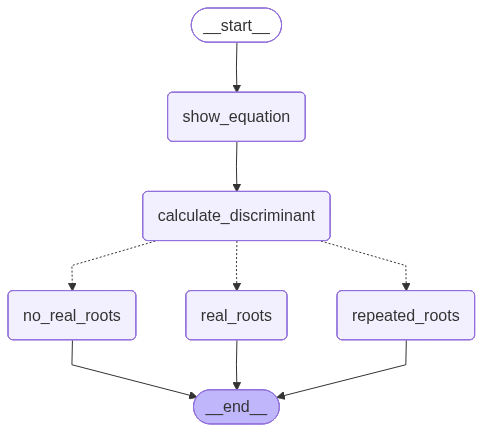

In [54]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [55]:
initial_state = {"a" : 4, "b" : -5, "c" : -4}

final_state = workflow.invoke(initial_state)

In [56]:
final_state

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2 -5x -4',
 'discriminant': 89,
 'result': 'The real-roots are 1.8042476415070754 and -0.5542476415070754'}